# Results

This Notebook visualizes the results gathered from the tests.

#### Loading data

In [37]:
import numpy as np
from os import path

data_path = 'src/model_training/accuracy_results/'

data = {}

data['epochs'] = np.arange(5, 105, 5)

netnames = ['resnet', 'mobilenet', 'vgg', 'densenet']
percentage_strings = ['010', '030', '050']
selectors = ['glister', 'k-centers', 'random']

for netname in netnames:

    frac_dict = {}
    
    filename = '100_{}'.format(netname)
    frac_dict[1] = np.loadtxt(data_path+filename+'.csv')
    
    for percentage_string in percentage_strings:
        frac = float(percentage_string)
        
        sel_dict = {}
        for selector in selectors:
            filename = '{}_{}_{}'.format(percentage_string, netname, selector)

            sel_dict[selector] = np.loadtxt(data_path+filename+'.csv')
            
        frac_dict[frac] = sel_dict
    
    data[netname] = frac_dict
                
                #data[filename] = np.loadtxt(data_path + filename + '.csv')

## Visualization

In [12]:
from matplotlib import pyplot as plt

In [39]:
def plot_accuracies_per_epoch(selector, title):
    
    percentages = [10, 30, 50]
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    fig.suptitle(title)
    fig.tight_layout()

    names = np.reshape(netnames, (2, 2))
    
    for row in range(2):
        for col in range(2):
            axes[row][col].set_title(names[row][col])
            axes[row][col].set_xlabel('Epochs')
            axes[row][col].set_ylabel('Accuracy')
            axes[row][col].set_autoscaley_on(False)
            axes[row][col].set_ylim([0.1, 0.9])

            axes[row][col].plot(data['epochs'], data[names[row][col]][1], label="100%")

            for percentage in percentages:
                axes[row][col].plot(data['epochs'], data[names[row][col]][percentage][selector], label=str(percentage) + '%')

            axes[row][col].label_outer()
            axes[row][col].legend()
            axes[row][col].grid()

#### GLISTER

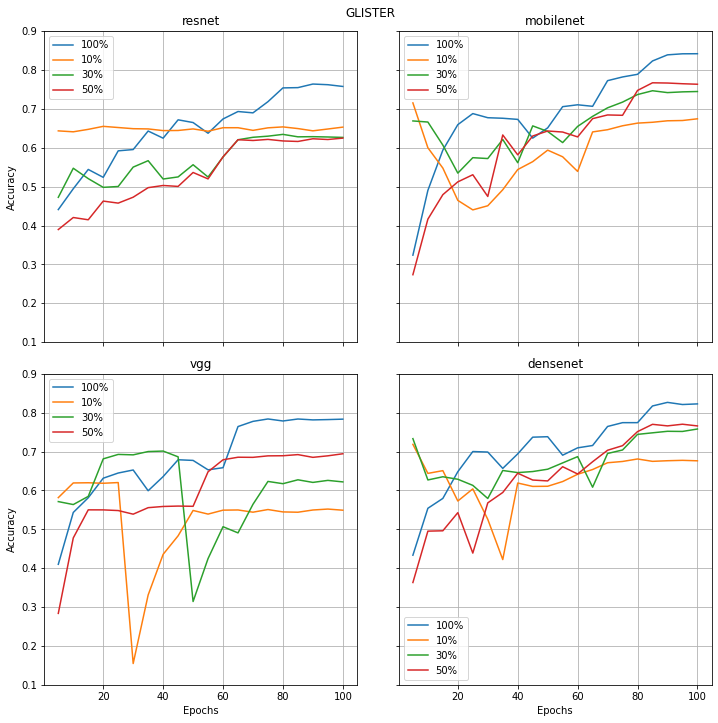

In [40]:
plot_accuracies_per_epoch('glister', 'GLISTER')

#### K-Centers

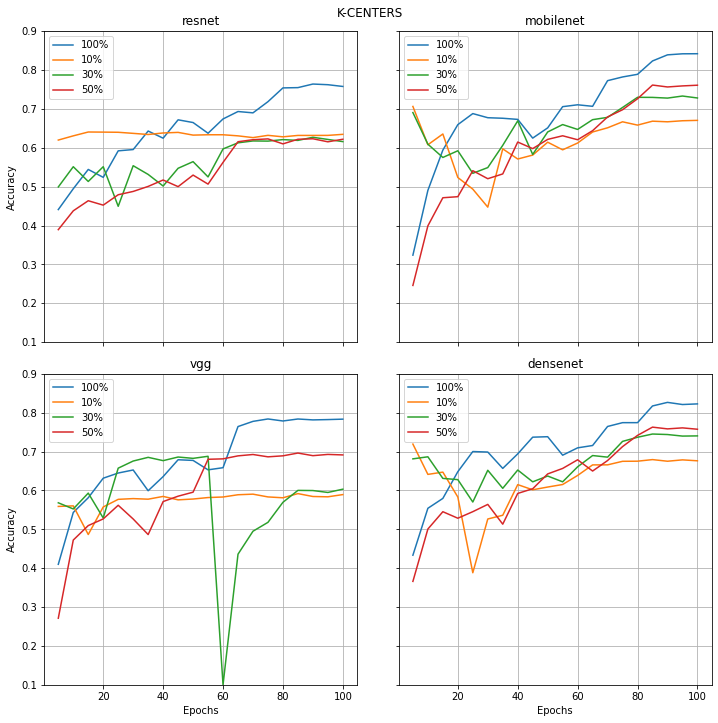

In [41]:
plot_accuracies_per_epoch('k-centers', 'K-CENTERS')

#### Random

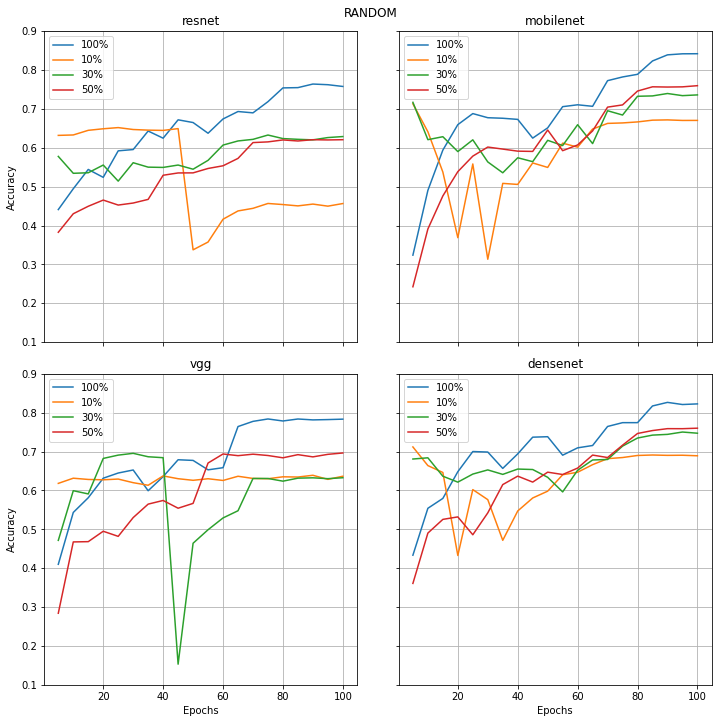

In [42]:
plot_accuracies_per_epoch('random', 'RANDOM')

#### Comparison of Coreset Selection Methods    

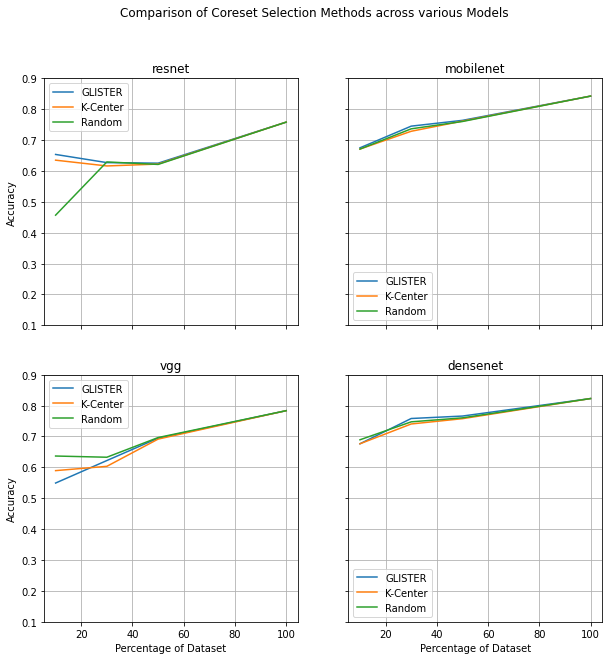

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

fig.suptitle('Comparison of Coreset Selection Methods across various Models')

names = np.reshape(netnames, (2, 2))

percentages = [10, 30, 50, 100]

for row in range(2):
    for col in range(2):
        
        glister = []
        kcenter = []
        random  = []
        
        for percentage in percentages[:3]:
            
            glister.append(data[names[row][col]][percentage]['glister'][-1])
            kcenter.append(data[names[row][col]][percentage]['k-centers'][-1])
            random.append(data[names[row][col]][percentage]['random'][-1])
            
        acc_full_data = data[names[row][col]][1][-1]
        glister.append(acc_full_data)
        kcenter.append(acc_full_data)
        random.append(acc_full_data)
                
        axes[row][col].plot(percentages, glister, label='GLISTER')
        axes[row][col].plot(percentages, kcenter, label='K-Center')
        axes[row][col].plot(percentages, random, label='Random')
        axes[row][col].set_title(names[row][col])
        axes[row][col].set_xlabel('Percentage of Dataset')
        axes[row][col].set_ylabel('Accuracy')
        axes[row][col].set_autoscaley_on(False)
        axes[row][col].set_ylim([0.1, 0.9])
        
        axes[row][col].label_outer()
        axes[row][col].legend()
        axes[row][col].grid()